# Customer Segmentation Project by Bamisaye Pious

# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Wrangle function

In [3]:
#Wrangle function which include data cleanining and preparation

def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    df['diabetes'] = df['diabetes'].astype(int)
    #Dropping column with multicollinearity
    df.drop(columns='skin', inplace = True)

    #Replacing the O value with the mean of the column
    df['insulin'] = df['insulin'].replace(0, np.nan)
    df['insulin'] = df['insulin'].fillna(df['insulin'].mean()).round(1)

    #Removing outliers in the age column
    low, high = df['age'].quantile([0.05, 0.95])
    df = df[df['age'].between(low, high)]
    


    return df

In [4]:

#Importing our dataset
df = wrangle(r"C:\Users\HP\Desktop\pima-data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, 0 to 767
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      733 non-null    int64  
 1   glucose_conc  733 non-null    int64  
 2   diastolic_bp  733 non-null    int64  
 3   thickness     733 non-null    int64  
 4   insulin       733 non-null    float64
 5   bmi           733 non-null    float64
 6   diab_pred     733 non-null    float64
 7   age           733 non-null    int64  
 8   diabetes      733 non-null    int32  
dtypes: float64(3), int32(1), int64(5)
memory usage: 54.4 KB


In [6]:
#checking our columns
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes'],
      dtype='object')

In [7]:
#check the numbers of rows and columns
df.shape

(733, 9)

In [8]:
#Checking the null values
df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
diabetes        0
dtype: int64

In [9]:
#checking the amount of duplicates
df.duplicated().sum()

0

# Exploring our dataset

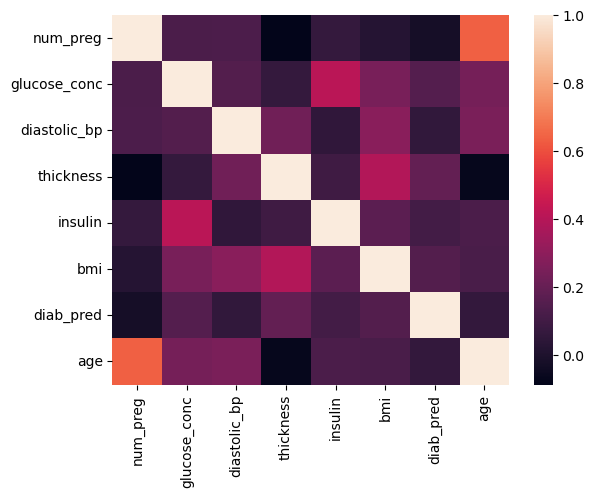

In [5]:
# correlation heatmap to make sure there is no multicollinearity column

correlation = df.drop(columns='diabetes').corr()
sns.heatmap(correlation);

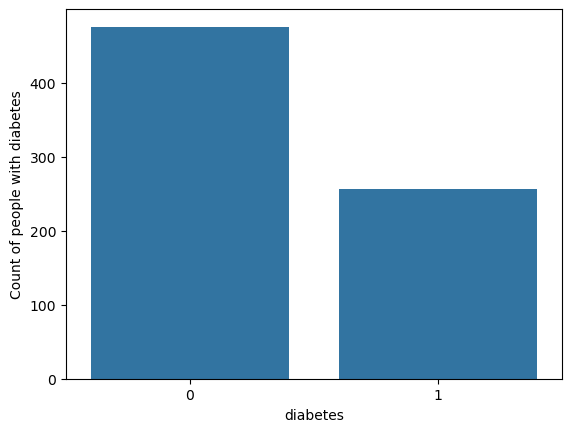

In [6]:
#Visualizing the number of people with diabetes

sns.countplot(x='diabetes', data=df)
plt.ylabel('Count of people with diabetes')
plt.show()

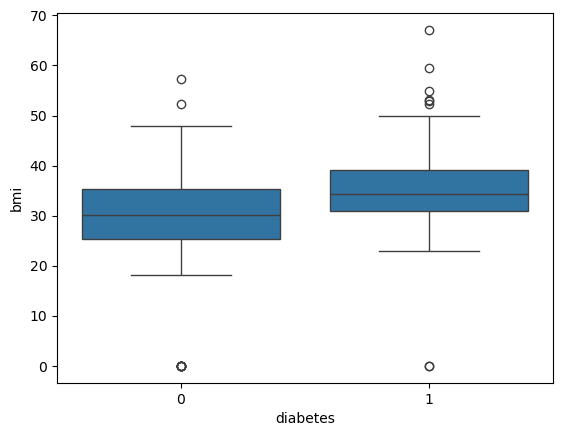

In [7]:
#Boxplot to compare BMI distribution between diabetic and non-diabetic individuals  

sns.boxplot(x='diabetes', y='bmi', data=df);

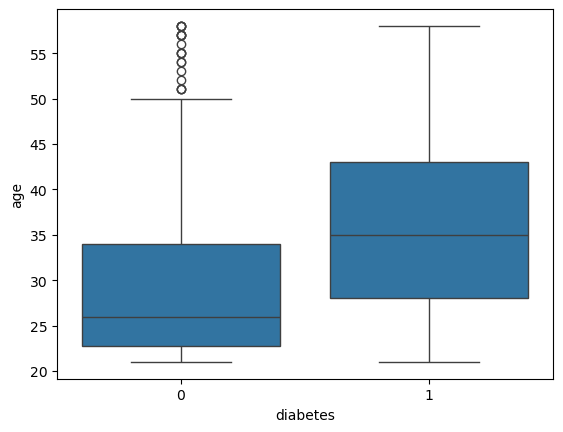

In [8]:
# Boxplot to compare Age distribution between diabetic and non-diabetic individuals and to get outliers

sns.boxplot(x='diabetes', y='age', data=df);


# Splitting

In [9]:
#spliting the target and features
X=  df.drop(columns = 'diabetes')
y = df['diabetes']

In [10]:
##Spliting to get our test, train, and validation set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2 , random_state = 42)

# Baseline

In [11]:
#Building our baseline
Baseline= y_train.value_counts(normalize=True).max()
print(f"Baseline accuracy score :  {Baseline}")

Baseline accuracy score :  0.6484641638225256


In [12]:
y_train.value_counts()

diabetes
0    380
1    206
Name: count, dtype: int64

# Build Model

In [13]:
model = LogisticRegression(class_weight='balanced',max_iter=1000)
model.fit(X_train, y_train)  

LogisticRegression(class_weight='balanced', max_iter=1000)

In [14]:
#Training our Model

y_pred_train = model.predict(X_train)
y_pred_train[:3]

array([1, 0, 0])

In [15]:
#TEsting our Model
y_pred_test = model.predict(X_test)
y_pred_train[:3]

array([1, 0, 0])

# Evaluation Metrics

In [16]:
#Checking our accuracy score for the training model and test model
print(f' Training model accuracy {model.score(X_train, y_train )}')
print(f' Testing model accuracy {model.score(X_test, y_test )}')

 Training model accuracy 0.7679180887372014
 Testing model accuracy 0.782312925170068


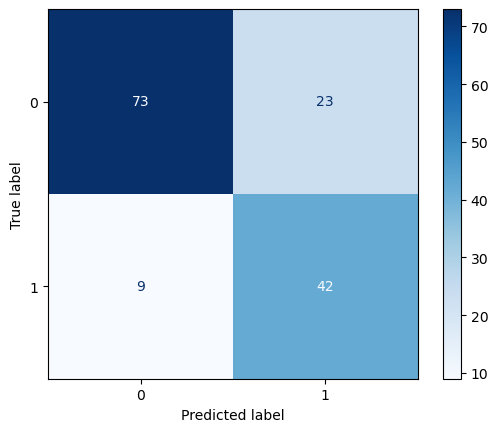

In [17]:
cm = confusion_matrix(y_test , y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model.classes_)
disp.plot(cmap = "Blues");

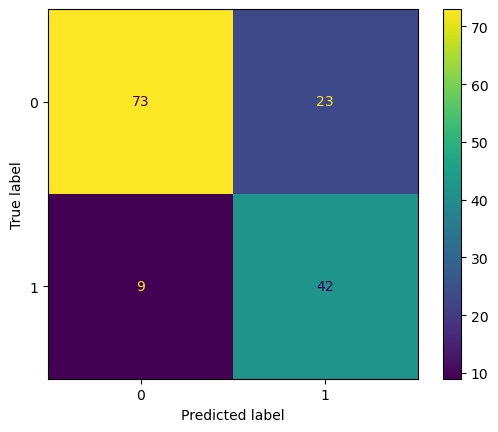

In [40]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [18]:
precision_score(y_test, y_pred_test)


0.6461538461538462

In [19]:
recall_score(y_test, y_pred_test)


0.8235294117647058

In [20]:
f1_score(y_test, y_pred_test)

0.7241379310344828

In [21]:
#checking probability estimate

y_train_pred_proba = model.predict_proba(X_train)
print(y_train_pred_proba[:5])

[[0.49318797 0.50681203]
 [0.56746988 0.43253012]
 [0.6695172  0.3304828 ]
 [0.81010065 0.18989935]
 [0.38046187 0.61953813]]


# Communicate Result

In [22]:
#Getting feature names from the dataset and extracting importances from model

features = X
importance = model.coef_[0]

In [39]:
model.coef_[0]

array([ 6.52645837e-02,  3.09603414e-02, -1.55101870e-02, -3.00550287e-03,
       -2.08015489e-04,  7.87123173e-02,  6.49480525e-01,  5.86474845e-02])

In [36]:
#creating a series with our features and importance to create  horizontal bar chart for the odd ratio
odd_ratio = pd.Series(np.exp(importance) , index = X.columns ).sort_values()

In [34]:
feature_importance = pd.Series(importance, index=X.columns).abs().sort_values(ascending=False)

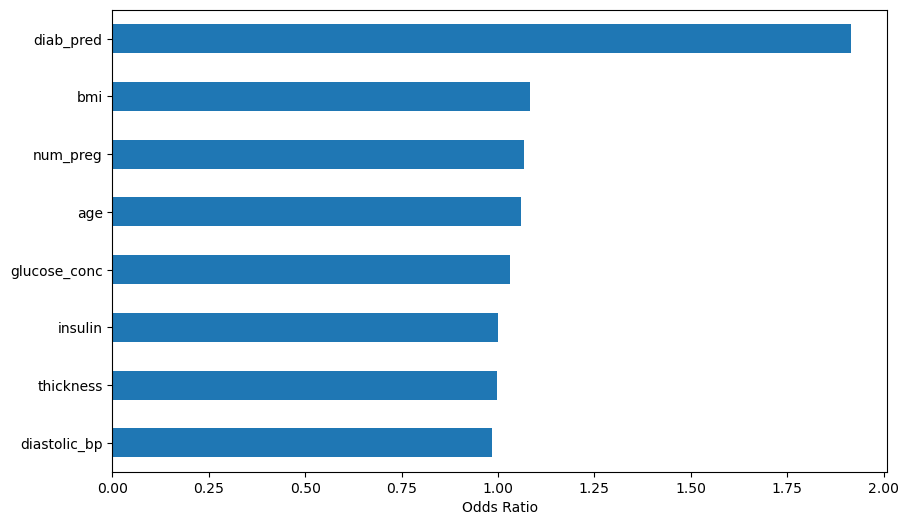

In [26]:
#Visualizing the odd ratio

odd_ratio.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Odds Ratio');

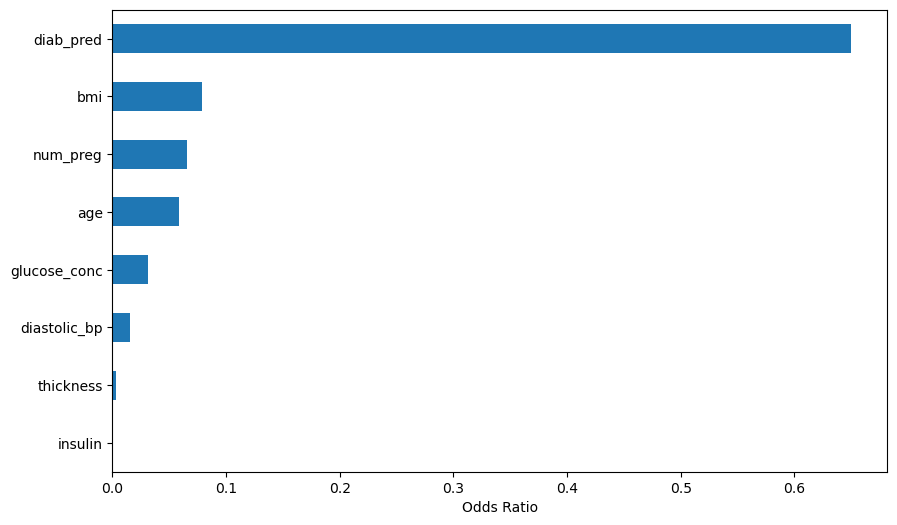

In [35]:
#Visualizing the odd ratio

feature_importance.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.xlabel('Odds Ratio');

# Make Prediction

In [27]:
def predict_diabetes (num_preg, glucose_conc , diastolic_bp, thickness, insulin,bmi,diab_pred, age):
    input = {'num_preg' : num_preg, 'glucose_conc': glucose_conc , 'diastolic_bp': diastolic_bp, 'thickness': thickness,
    'insulin': insulin, 'bmi': bmi,'diab_pred': diab_pred, 'age': age}
                         
    df = pd.DataFrame(input, index =[0])
    prediction= model.predict(df)
    if prediction == 1:
        return 'The person is likely to have diabetes'
    else:
        return 'The person is unlikely to have diabetes'

In [28]:
predict_diabetes(1,67,98,200,50,30,5,50)

'The person is likely to have diabetes'